## **Introduction**

This document details the analysis of a dataset containing vibration measurements from various sensors attached to bearings. The purpose of this analysis is to identify patterns and anomalies in the data, which could potentially indicate bearing wear or failure. The dataset consists of multiple files, each representing a snapshot of sensor readings taken at a specific time. The data was merged into a single DataFrame for comprehensive analysis. 

In [6]:
import numpy as np # linear algebra
import pandas as pd
import os, random

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

*Data Loading and Merging*:
The dataset, consisting of several files, was read and merged into a single DataFrame. Each file contains 20480 samples with measurements from eight channels (B1x, B1y, B2x, B2y, B3x, B3y, B4x, B4y). The time of each measurement was computed based on the timestamp in the filename and the sampling rate of 20 kHz.

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
from tqdm import tqdm
from dataclasses import dataclass
from typing import Dict


## Defining a dataclass to represent the dataset
@dataclass(frozen=True)
class Dataset:
    path: Path
    channel_names: Dict[int, str]
    first_ts: pd.Timestamp

# Set the correct path to the folder containing all files
set_no_1 = Dataset(
    path=Path("C:/Users/jacop/Desktop/IE master/Term 3/Corporate Project/archive (1)/1st_test/1st_test"),
    channel_names={
        0: "B1x",
        1: "B1y",
        2: "B2x",
        3: "B2y",
        4: "B3x",
        5: "B3y",
        6: "B4x",
        7: "B4y",
    },
    first_ts=pd.to_datetime("2003-10-22 12:06:24"),
)

## Function to read the dataset from the provided path
def read_dataset(dataset: Dataset):
    all_dfs = []
    for file_counter, f in enumerate(tqdm(sorted(dataset.path.iterdir()))):
              # Reading each file and assigning column names
        df = pd.read_csv(f, sep="\t", header=None, dtype=np.float32).rename(
            columns=dataset.channel_names
        )
        ts = pd.to_datetime(f.name, format="%Y.%m.%d.%H.%M.%S")
        measurement_delta = (ts - dataset.first_ts).total_seconds()
        step_s = 1 / 20000  # 20 kHz sampling
        df["time"] = measurement_delta + np.arange(len(df)) * step_s
        df["measurement_id"] = file_counter
        df["measurement_id"] = df["measurement_id"].astype(np.uint32)
        if len(df) != 20480:
            raise RuntimeError(f"Unexpected file length {len(df)} in {f}")
        all_dfs.append(df)

    return pd.concat(all_dfs, ignore_index=True)

# Using the set_no_1 instance with the correct path
dataset = set_no_1
merged_df = read_dataset(dataset)
merged_df.to_csv('C:/Users/jacop/Desktop/IE master/Term 3/Corporate Project/merged_dataset.csv', index=False)
print("Merging complete. Data saved to C:/Users/jacop/Desktop/IE master/Term 3/Corporate Project/merged_dataset.csv")


FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/jacop/Desktop/IE master/Term 3/Corporate Project/archive (1)/1st_test/1st_test'

In [8]:
# Replace 'file_path.csv' with the path to your CSV file
file_path = "C:/Users/jacop/Desktop/IE master/Term 3/Corporate Project/Raw_data/merged_dataset.csv"

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
df.head()
df.tail()

,B1x,B1y,B2x,B2y,B3x,B3y,B4x,B4y,time,measurement_id
44154875,-0.168,-0.068,-0.449,0.190,0.117,1.196,-0.037,-0.122,2.979213e+06,2155
44154876,-0.112,0.088,-0.493,0.266,-0.266,0.342,-0.339,-0.164,2.979213e+06,2155
44154877,-0.081,-0.020,-0.325,-0.049,-0.112,-0.481,-0.300,-0.007,2.979213e+06,2155
44154878,-0.115,-0.146,-0.190,-0.427,0.813,0.049,-0.205,0.105,2.979213e+06,2155
44154879,-0.098,-0.166,0.012,-0.552,-0.071,0.588,-0.159,0.232,2.979213e+06,2155


In [9]:
df.shape

(44154880, 10)

### There is a hole in the dataset between the first file and the second. This occurs between entry 20480 and 20481 (last entry of file 1 with respect to first entry of file 2)


In [10]:
# Investigating a gap in the dataset between files
btw_file = 4
n = 20480
df.iloc[btw_file*n-10:btw_file*n+10]


,B1x,B1y,B2x,B2y,B3x,B3y,B4x,B4y,time,measurement_id
81910,-0.144,-0.105,-0.127,-0.059,-0.259,0.022,-0.100,-0.146,770.02350,3
81911,-0.127,-0.120,-0.261,-0.039,-0.046,0.061,-0.063,-0.146,770.02355,3
81912,-0.176,0.034,-0.334,-0.066,-0.195,-0.271,-0.039,-0.100,770.02360,3
81913,-0.222,0.110,-0.212,-0.110,-0.085,-0.132,-0.002,-0.117,770.02365,3
81914,-0.176,-0.027,-0.098,-0.168,-0.112,-0.054,-0.098,-0.066,770.02370,3
81915,0.012,-0.093,-0.120,-0.100,-0.049,-0.059,-0.103,-0.120,770.02375,3
81916,-0.051,-0.125,-0.186,0.061,-0.146,-0.229,-0.076,-0.090,770.02380,3
81917,-0.151,-0.105,-0.171,-0.061,-0.154,0.115,-0.029,-0.085,770.02385,3
81918,-0.066,-0.166,-0.010,-0.056,-0.220,-0.327,-0.125,-0.007,770.02390,3
81919,-0.066,-0.127,0.059,-0.125,-0.090,-0.239,-0.183,0.015,770.02395,3


In [11]:
# Calculating the time difference between successive files
time_diff= df.iloc[btw_file*n]['time'] -  df.iloc[btw_file*n-1]['time']
time_diff

298.97605

## Identification of Data Gaps:

A significant gap in the dataset was identified between specific files, indicating a period with no measurements. This was crucial for understanding potential periods of inactivity or data loss.

### The file in which the difference in time between one file and the next one is 500 seconds is on file 42.

In [2]:
# Identifying the file with a significant time difference (greater than 5 days)
btw_file = 20480
for n in range(1, 2156):
    time_diff = df.iloc[btw_file * n]['time'] - df.iloc[btw_file * n - 1]['time']
    print(time_diff)
    if time_diff > 3600 * 24 * 5:
        print("The value of n where time_diff is greater than 300 is:", n)
        break
        


NameError: name 'df' is not defined

In [ ]:
 # Checking unique measurement IDs to ensure proper data loading
 df['measurement_id'].unique()

array([   0,    1,    2, ..., 2153, 2154, 2155], dtype=int64)

In [ ]:
df.shape

(44154880, 10)

In [ ]:
df.describe()

,B1x,B1y,B2x,B2y,B3x,B3y,B4x,B4y,time,measurement_id
count,4.415488e+07,4.415488e+07,4.415488e+07,4.415488e+07,4.415488e+07,4.415488e+07,4.415488e+07,4.415488e+07,4.415488e+07,4.415488e+07
mean,-1.159462e-01,-1.157034e-01,-1.157601e-01,-1.156509e-01,-1.127605e-01,-1.128768e-01,-1.128492e-01,-1.127205e-01,1.835344e+06,1.077500e+03
std,9.888998e-02,8.933114e-02,9.482669e-02,7.862779e-02,1.181106e-01,1.215672e-01,9.633911e-02,9.893755e-02,8.463450e+05,6.223835e+02
min,-1.042000e+00,-1.086000e+00,-9.910000e-01,-8.300000e-01,-5.000000e+00,-5.000000e+00,-3.975000e+00,-3.801000e+00,0.000000e+00,0.000000e+00
25%,-1.780000e-01,-1.730000e-01,-1.780000e-01,-1.660000e-01,-1.860000e-01,-1.880000e-01,-1.660000e-01,-1.680000e-01,1.044770e+06,5.387500e+02
50%,-1.150000e-01,-1.150000e-01,-1.150000e-01,-1.150000e-01,-1.120000e-01,-1.120000e-01,-1.120000e-01,-1.120000e-01,2.095643e+06,1.077500e+03
75%,-5.400000e-02,-5.900000e-02,-5.100000e-02,-6.300000e-02,-3.900000e-02,-3.700000e-02,-6.100000e-02,-5.600000e-02,2.548210e+06,1.616250e+03
max,7.010000e-01,1.025000e+00,7.280000e-01,5.520000e-01,4.998000e+00,4.724000e+00,3.938000e+00,3.596000e+00,2.979213e+06,2.155000e+03


 ## Exploratory Data Analysis (EDA):
### Showing a Line graph with the vibration (only B1X)

1) The shape and structure of the merged DataFrame were examined, confirming the expected size and continuity of the data.
2) We plotted a line graph to visualize the vibration measurements from the B1x sensor over time.

<Axes: xlabel='time'>

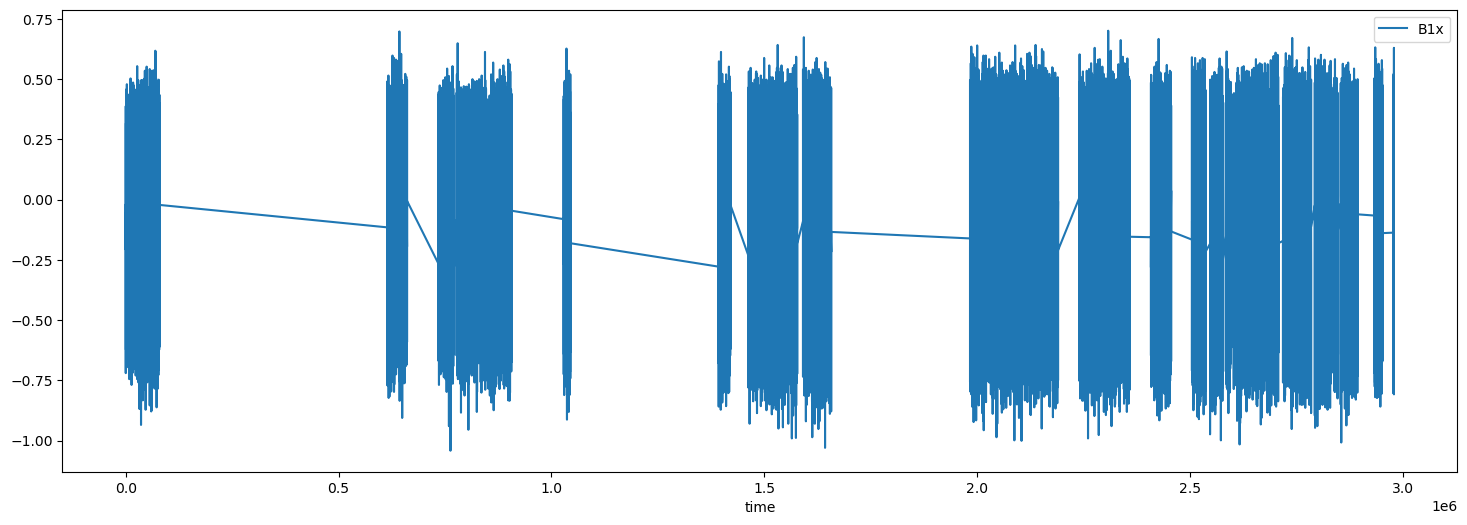

In [13]:
# Plotting a line graph for vibration data (B1x sensor)
df.plot(x = 'time', y = 'B1x', figsize = (18,6))

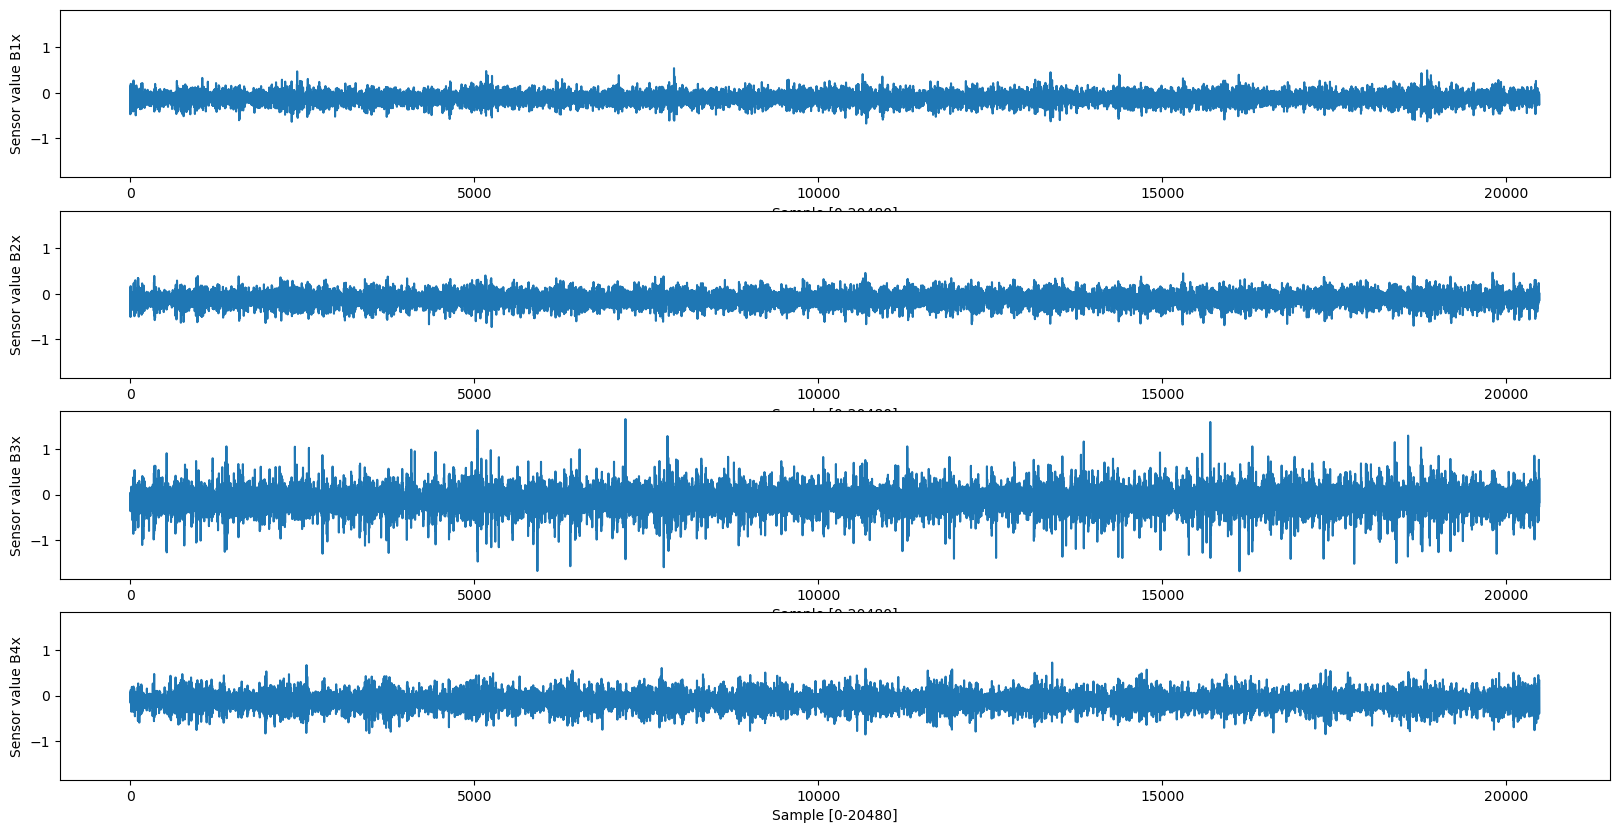

In [ ]:
# Comparing sensor data across multiple snapshots
fig, axes = plt.subplots(nrows=4, ncols=1, sharey=True, figsize=(20, 10))
x = np.arange(20480)

for (sensor, ax) in zip(["B1x", "B2x", "B3x", "B4x"], axes.ravel()):
    ax.plot(x, df.query("measurement_id == 2150")[sensor], label="Snapshot 2100")
   # ax.plot(x, df.query("measurement_id == 0")[sensor], label="First snapshot")
    ax.set_ylabel(f"Sensor value {sensor}")
    ax.set_xlabel("Sample [0-20480]")
plt.show()

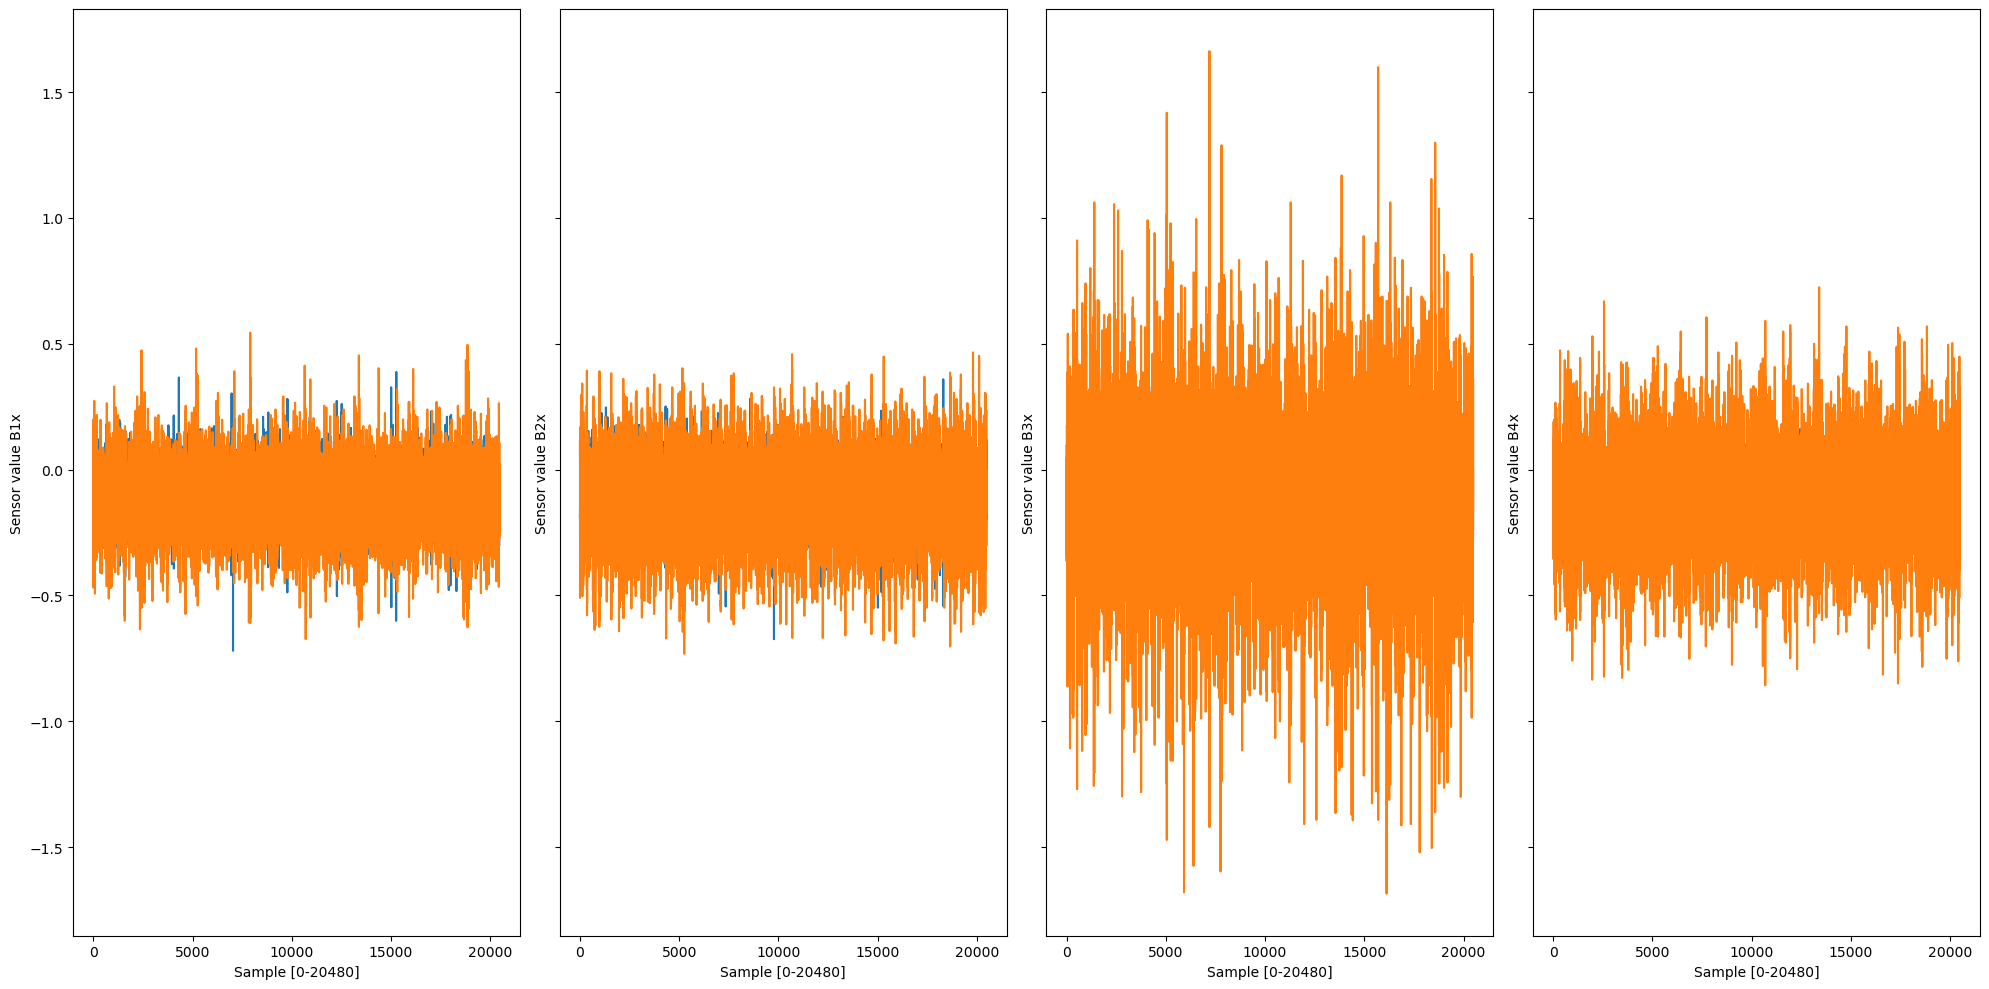

In [16]:
# Comparing the first and a later snapshot for sensor data
fig, axes = plt.subplots(nrows=1, ncols=4, sharey=True, figsize=(20, 10))
x = np.arange(20480)

for (sensor, ax) in zip(["B1x", "B2x", "B3x", "B4x"], axes.ravel()):
    ax.plot(x, df.query("measurement_id == 0")[sensor], label="First snapshot")
    ax.plot(x, df.query("measurement_id == 2150")[sensor], label="Snapshot 1000")
    ax.set_ylabel(f"Sensor value {sensor}")
    ax.set_xlabel("Sample [0-20480]")
plt.tight_layout()
plt.show()

# Showing Standard Deviation

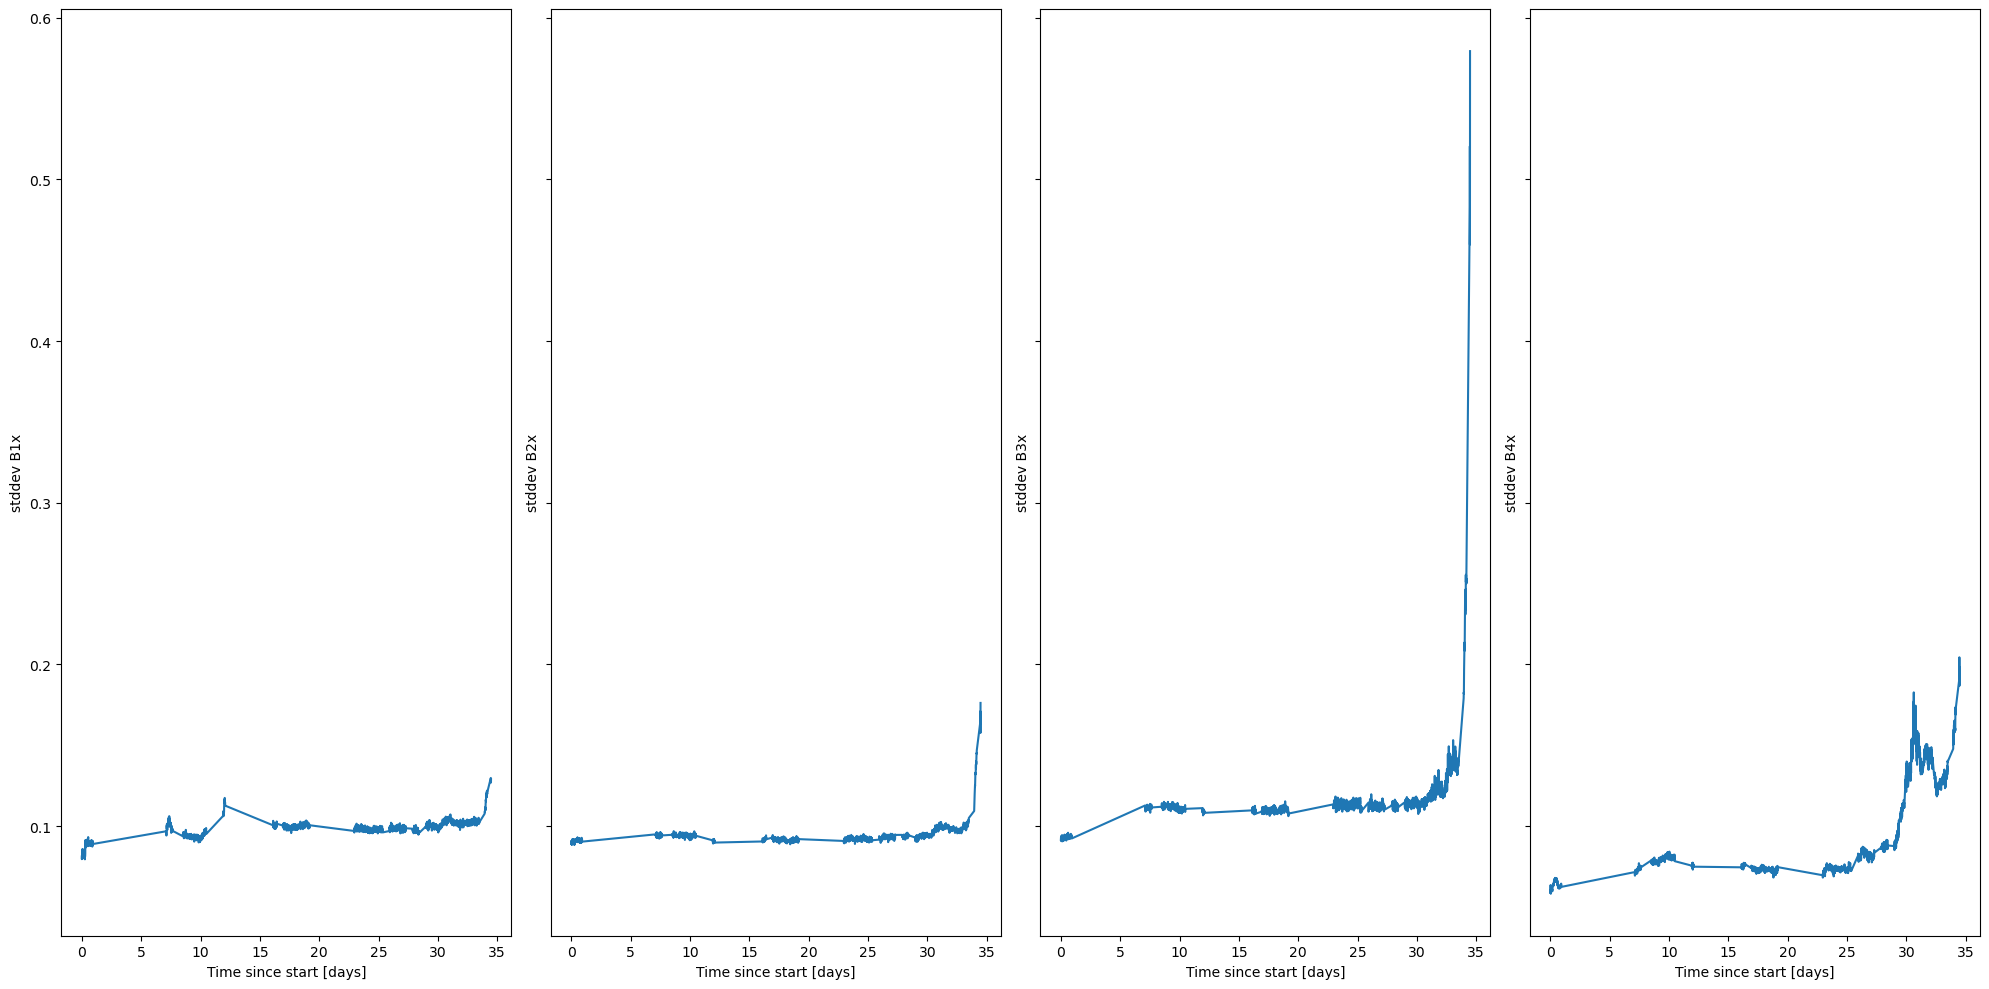

In [ ]:
# Showing standard deviation of sensor data over time
fig, axes = plt.subplots(nrows=1, ncols=4, sharey=True, figsize=(20, 10))
x = df.groupby("measurement_id")["time"].head(1) / (3600 * 24)
for (sensor, ax) in zip(["B1x", "B2x", "B3x", "B4x"], axes.ravel()):
    y = df.groupby("measurement_id")[sensor].std(ddof=0)
    ax.plot(x, y)
    ax.set_ylabel(f"stddev {sensor}")
    ax.set_xlabel("Time since start [days]")
plt.tight_layout()
plt.show()

## Outlier Detection:

An algorithm is implemented to detect outliers in the data based on the moving average and standard deviation. Outliers are identified as points lying more than three standard deviations away from the moving average.

In [ ]:
# Function to detect outliers based on 3 standard deviations from the moving average
def detect_first_outlier(df, sensor, window_size=100, threshold=3):
    df = df.copy()
    df['moving_avg'] = df[sensor].rolling(window=window_size, min_periods=1).mean()
    df['moving_std'] = df[sensor].rolling(window=window_size, min_periods=1).std(ddof=0)
    df['upper_bound'] = df['moving_avg'] + (threshold * df['moving_std'])
    df['lower_bound'] = df['moving_avg'] - (threshold * df['moving_std'])
    df['outlier'] = ((df[sensor] > df['upper_bound']) | (df[sensor] < df['lower_bound']))
    outliers = df[df['outlier']]
    if not outliers.empty:
        return outliers.index[0]
    else:
        return None

# Find the position of the first outlier for each sensor
first_outliers = {}
for sensor in ["B1x", "B2x", "B3x", "B4x"]:
    first_outliers[sensor] = df.groupby("measurement_id").apply(detect_first_outlier, sensor=sensor)

# Print the position of the first outlier for each sensor
for sensor, position in first_outliers.items():
    print(f"The first outlier in {sensor} is at position {position.dropna().values[0]} in the index")


The first outlier in B1x is at position 330 in the index
The first outlier in B2x is at position 975 in the index
The first outlier in B3x is at position 87 in the index
The first outlier in B4x is at position 471 in the index


In [ ]:
# Displaying data for a position 330 in B1x
df[df['measurement_id'] == 330]

,B1x,B1y,B2x,B2y,B3x,B3y,B4x,B4y,time,measurement_id
6758400,-0.215,-0.159,-0.034,-0.090,-0.320,0.032,-0.186,-0.117,797720.00000,330
6758401,-0.093,-0.195,0.007,-0.049,-0.161,-0.195,-0.122,-0.176,797720.00005,330
6758402,0.010,-0.188,-0.149,-0.044,-0.039,-0.085,-0.054,-0.259,797720.00010,330
6758403,-0.027,-0.183,-0.112,-0.107,-0.132,-0.215,-0.115,-0.154,797720.00015,330
6758404,-0.181,-0.181,-0.063,-0.061,-0.078,-0.229,-0.227,-0.156,797720.00020,330
...,...,...,...,...,...,...,...,...,...,...
6778875,0.034,-0.090,-0.129,-0.020,-0.144,-0.093,-0.117,-0.112,797721.02375,330
6778876,-0.115,-0.164,-0.051,0.032,-0.283,-0.161,-0.134,-0.149,797721.02380,330
6778877,-0.173,-0.139,-0.015,-0.098,-0.283,-0.310,-0.217,-0.085,797721.02385,330
6778878,-0.166,-0.115,-0.002,-0.044,-0.049,-0.117,-0.186,-0.112,797721.02390,330


In [ ]:
# Converting a specific timestamp to days
797720/(3600*24)

9.232870370370371

## Statistical Analysis:

The standard deviation of sensor measurements is calculated and plotted to observe the variation over time. This analysis is split into different periods to highlight changes in the vibration patterns:

-Entire dataset.
-First 25 days.
-After the 25th day.

The mean of the sensor measurements is also calculated and plotted for different time periods (e.g., first 10 days, days 20-30, and days 30-35).

### Entire DataSet

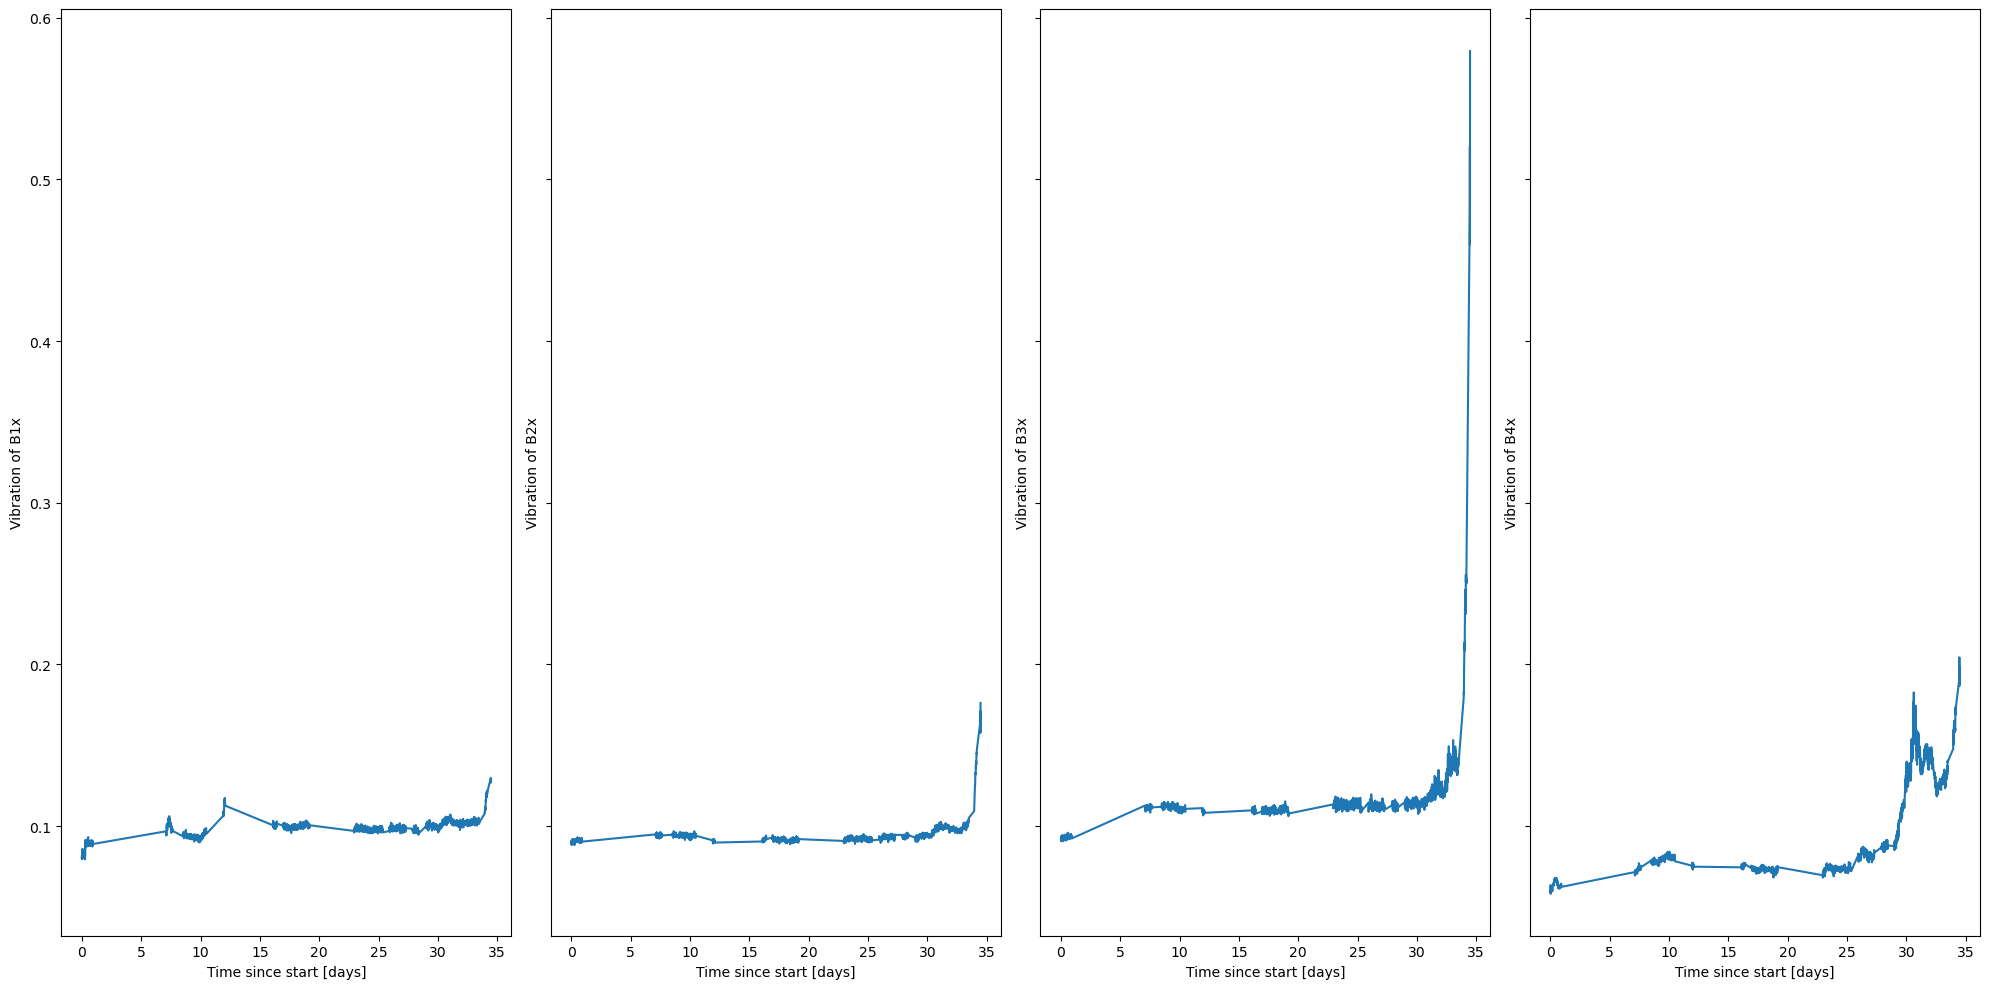

In [ ]:
# Plotting the standard deviation of each file to bearing vibration
fig, axes = plt.subplots(nrows=1, ncols=4, sharey=True, figsize=(20, 10))
x = df.groupby("measurement_id")["time"].head(1) / (3600 * 24)
for (sensor, ax) in zip(["B1x", "B2x", "B3x", "B4x"], axes.ravel()):
    y = df.groupby("measurement_id")[sensor].std(ddof=0)
    ax.plot(x, y)
    ax.set_ylabel(f"Vibration of {sensor}")
    ax.set_xlabel("Time since start [days]")
plt.tight_layout()
plt.show()

### Standard deviation of the first 25 days

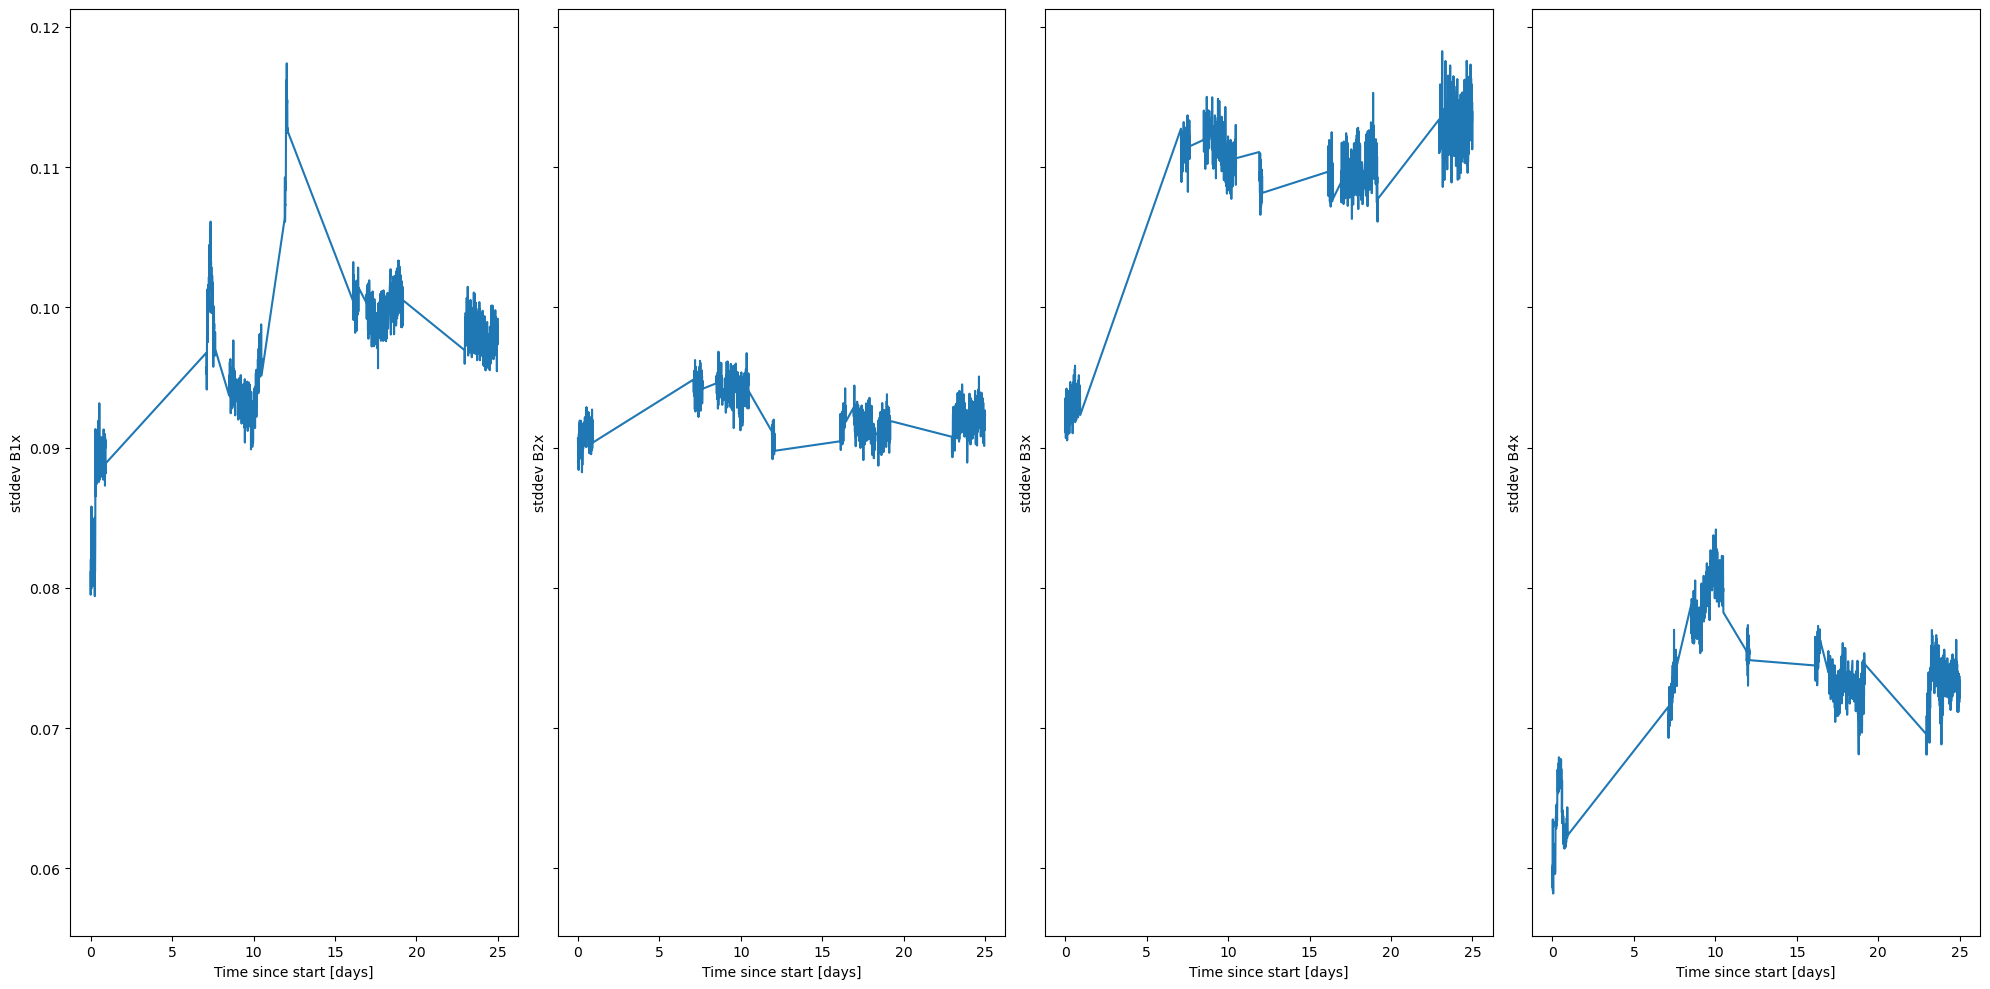

In [ ]:
# Plotting standard deviation for the first 25 days
first_25_days = 25 * 24 * 3600

# Filter data to include only the first 25 days
filtered_df = df[df['time'] <= first_25_days]

fig, axes = plt.subplots(nrows=1, ncols=4, sharey=True, figsize=(20, 10))
x = filtered_df.groupby("measurement_id")["time"].head(1) / (3600 * 24)  # Convert time to days

for (sensor, ax) in zip(["B1x", "B2x", "B3x", "B4x"], axes.ravel()):
    y = filtered_df.groupby("measurement_id")[sensor].std(ddof=0)  # Calculate standard deviation
    ax.plot(x, y)
    ax.set_ylabel(f"stddev {sensor}")
    ax.set_xlabel("Time since start [days]")

plt.tight_layout()
plt.show()

### Standard deviation after the 25th day

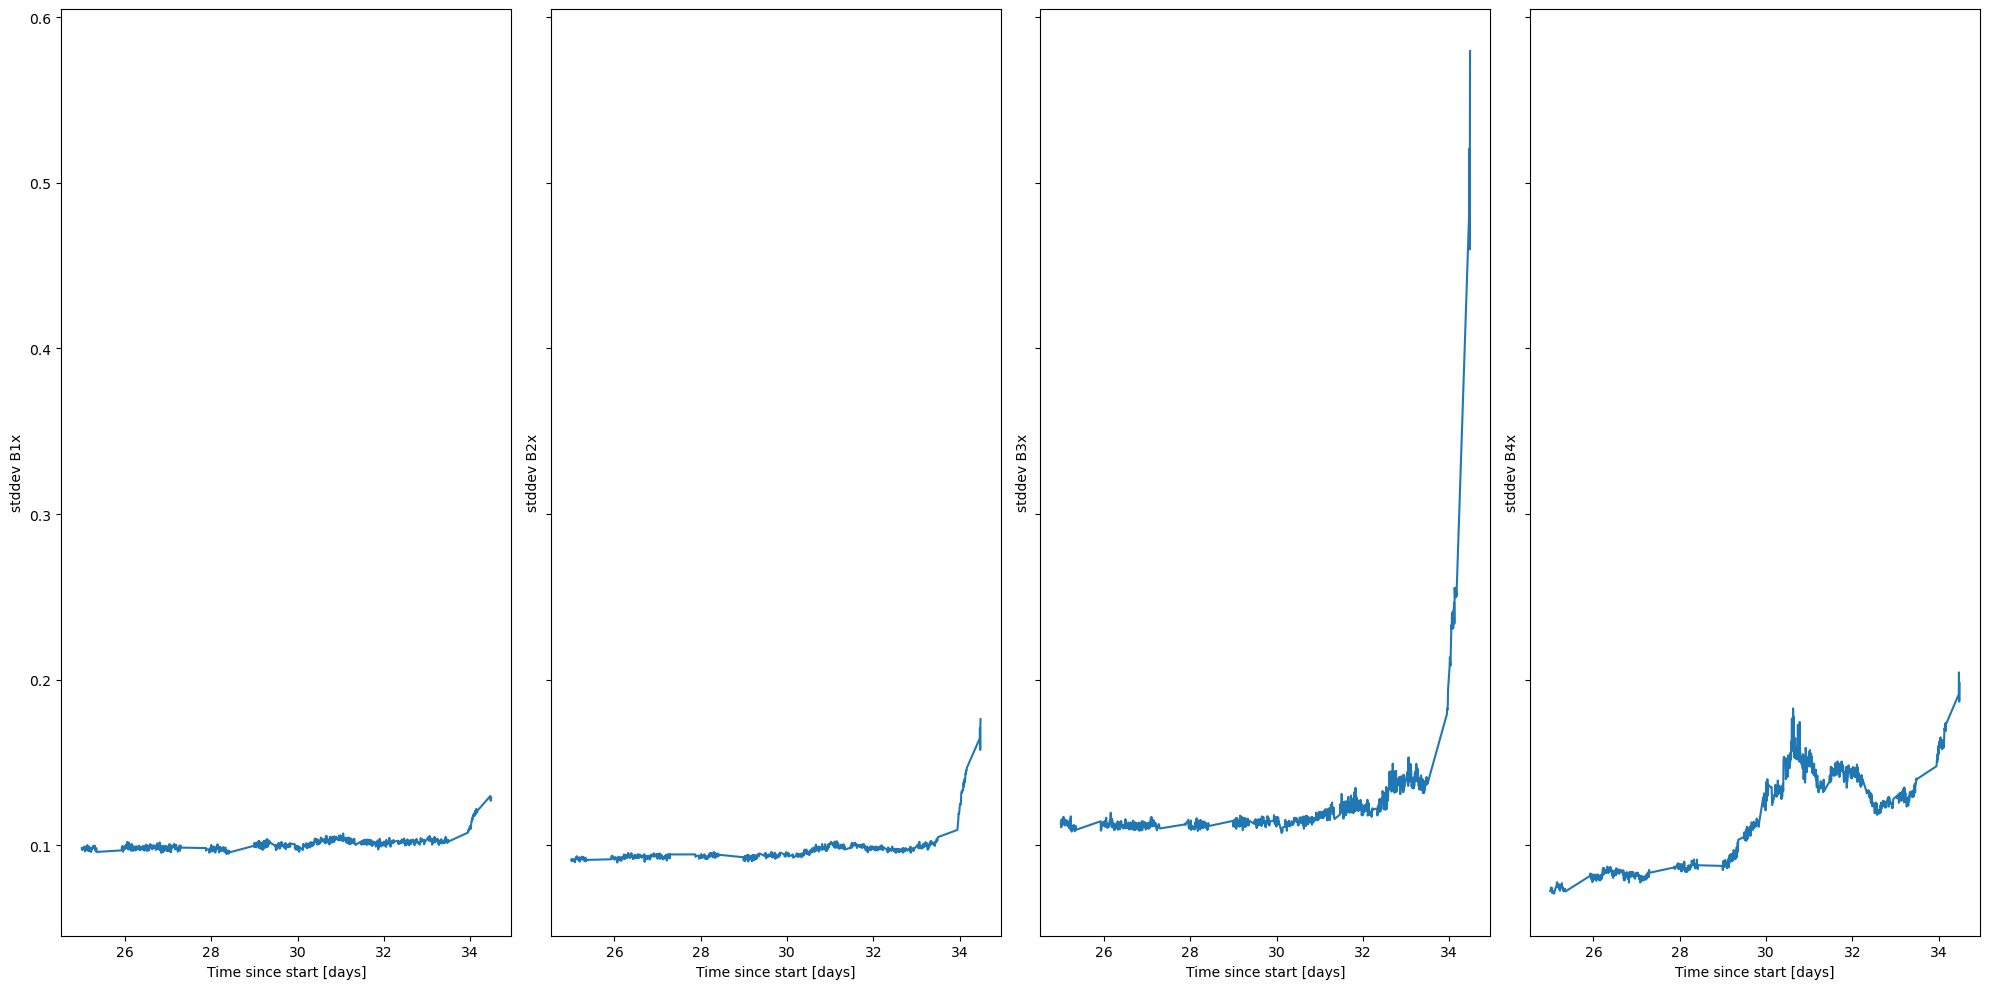

In [ ]:
first_25_days = 25 * 24 * 3600

# Filter data to include only the first 25 days
filtered_df = df[df['time'] > first_25_days]

fig, axes = plt.subplots(nrows=1, ncols=4, sharey=True, figsize=(20, 10))
x = filtered_df.groupby("measurement_id")["time"].head(1) / (3600 * 24)  # Convert time to days

for (sensor, ax) in zip(["B1x", "B2x", "B3x", "B4x"], axes.ravel()):
    y = filtered_df.groupby("measurement_id")[sensor].std(ddof=0)  # Calculate standard deviation
    ax.plot(x, y)
    ax.set_ylabel(f"stddev {sensor}")
    ax.set_xlabel("Time since start [days]")

plt.tight_layout()
plt.show()

## Calculating the mean after the STDv
The mean provides the average value of the sensor readings over time.
It is a central tendency measure that helps us understand the overall level of vibration.

By analyzing the mean vibration levels over time, we can detect shifts in the baseline operation of the bearings. A gradual increase in the mean vibration level could indicate a worsening condition of the bearings

This analysis is split into different periods to highlight changes in the vibration patterns:

-Entire dataset
-First 10 days
-From day 20 to day 30
-From day 30 to day 35

### Calculating the mean across the dataset

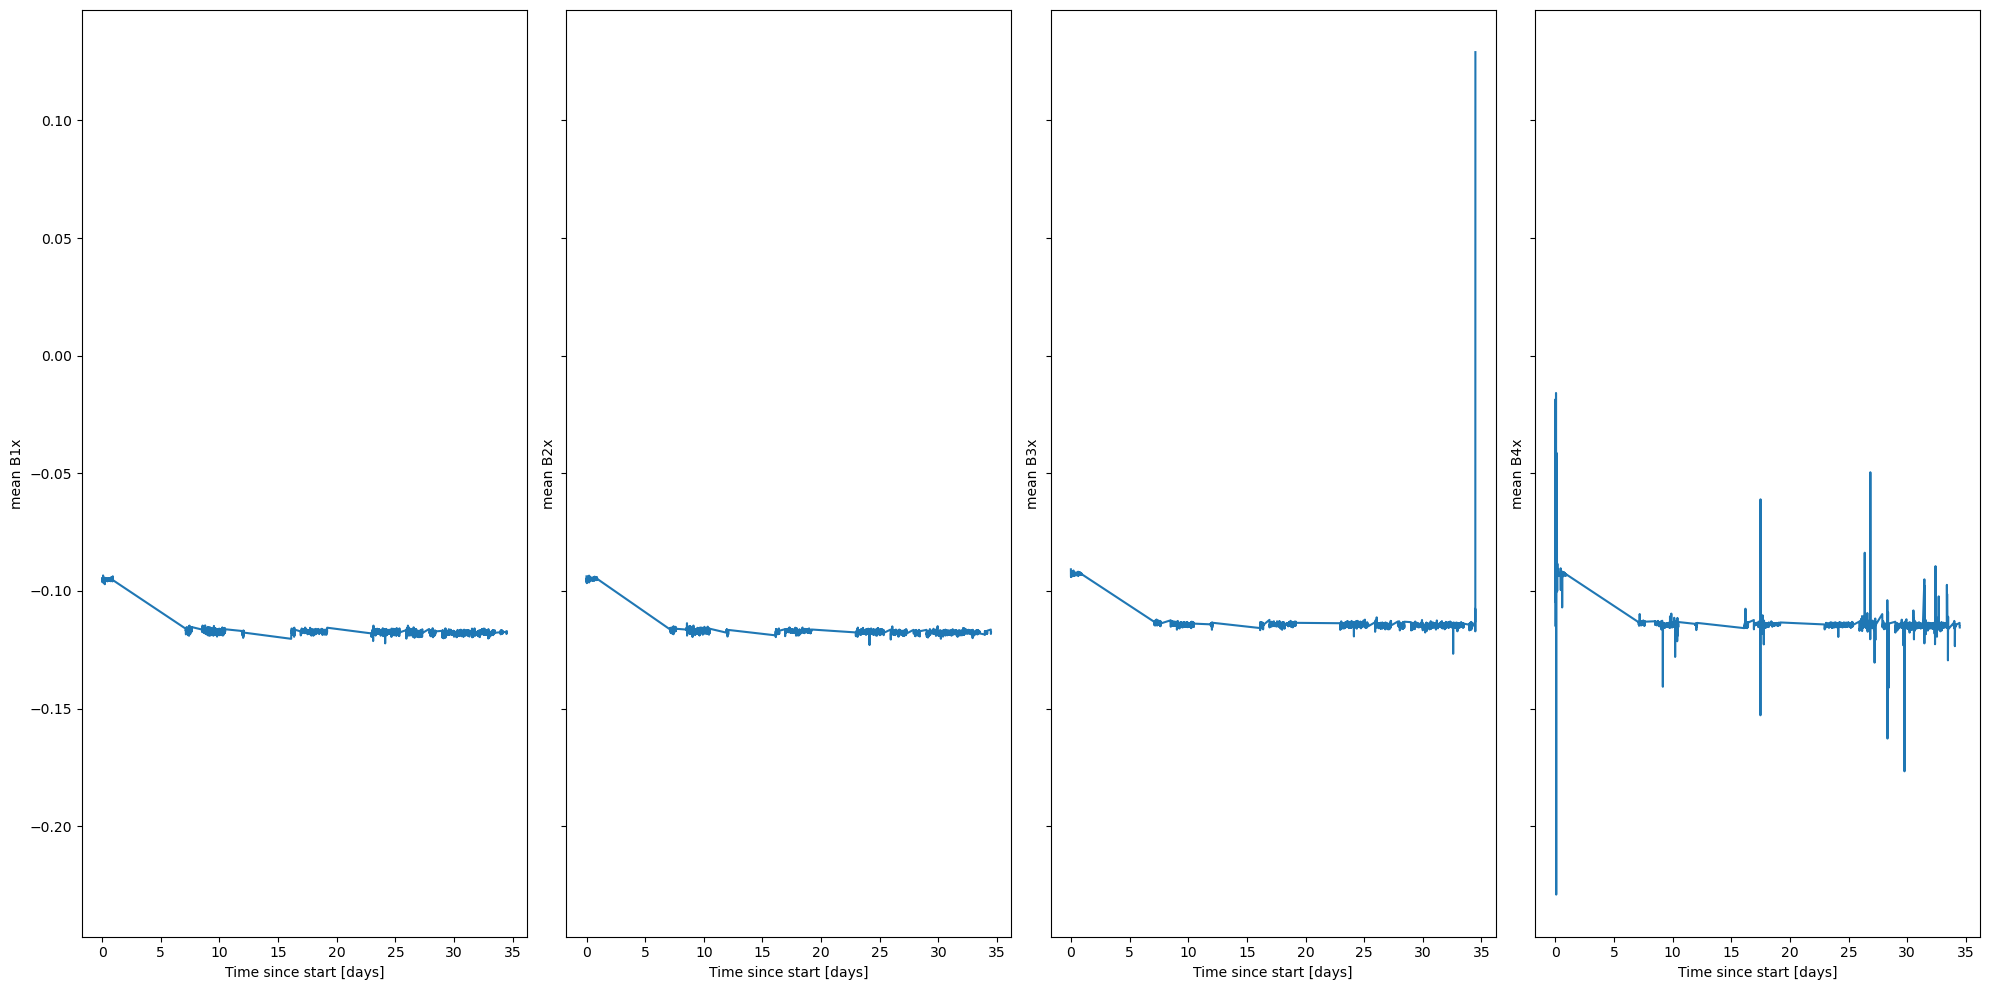

In [ ]:
# Create a figure and a set of subplots with 1 row and 4 columns.
fig, axes = plt.subplots(nrows=1, ncols=4, sharey=True, figsize=(20, 10))

# Calculate the time in days for each measurement ID by grouping by 'measurement_id'
# and taking the first 'time' entry in each group, then convert the time from seconds to days.
x = df.groupby("measurement_id")["time"].head(1) / (3600 * 24)
for (sensor, ax) in zip(["B1x", "B2x", "B3x", "B4x"], axes.ravel()):
    y = df.groupby("measurement_id")[sensor].mean()
    ax.plot(x, y)
    ax.set_ylabel(f"mean {sensor}")
    ax.set_xlabel("Time since start [days]")
plt.tight_layout()
plt.show()

 ### Calculating mean first 10 days

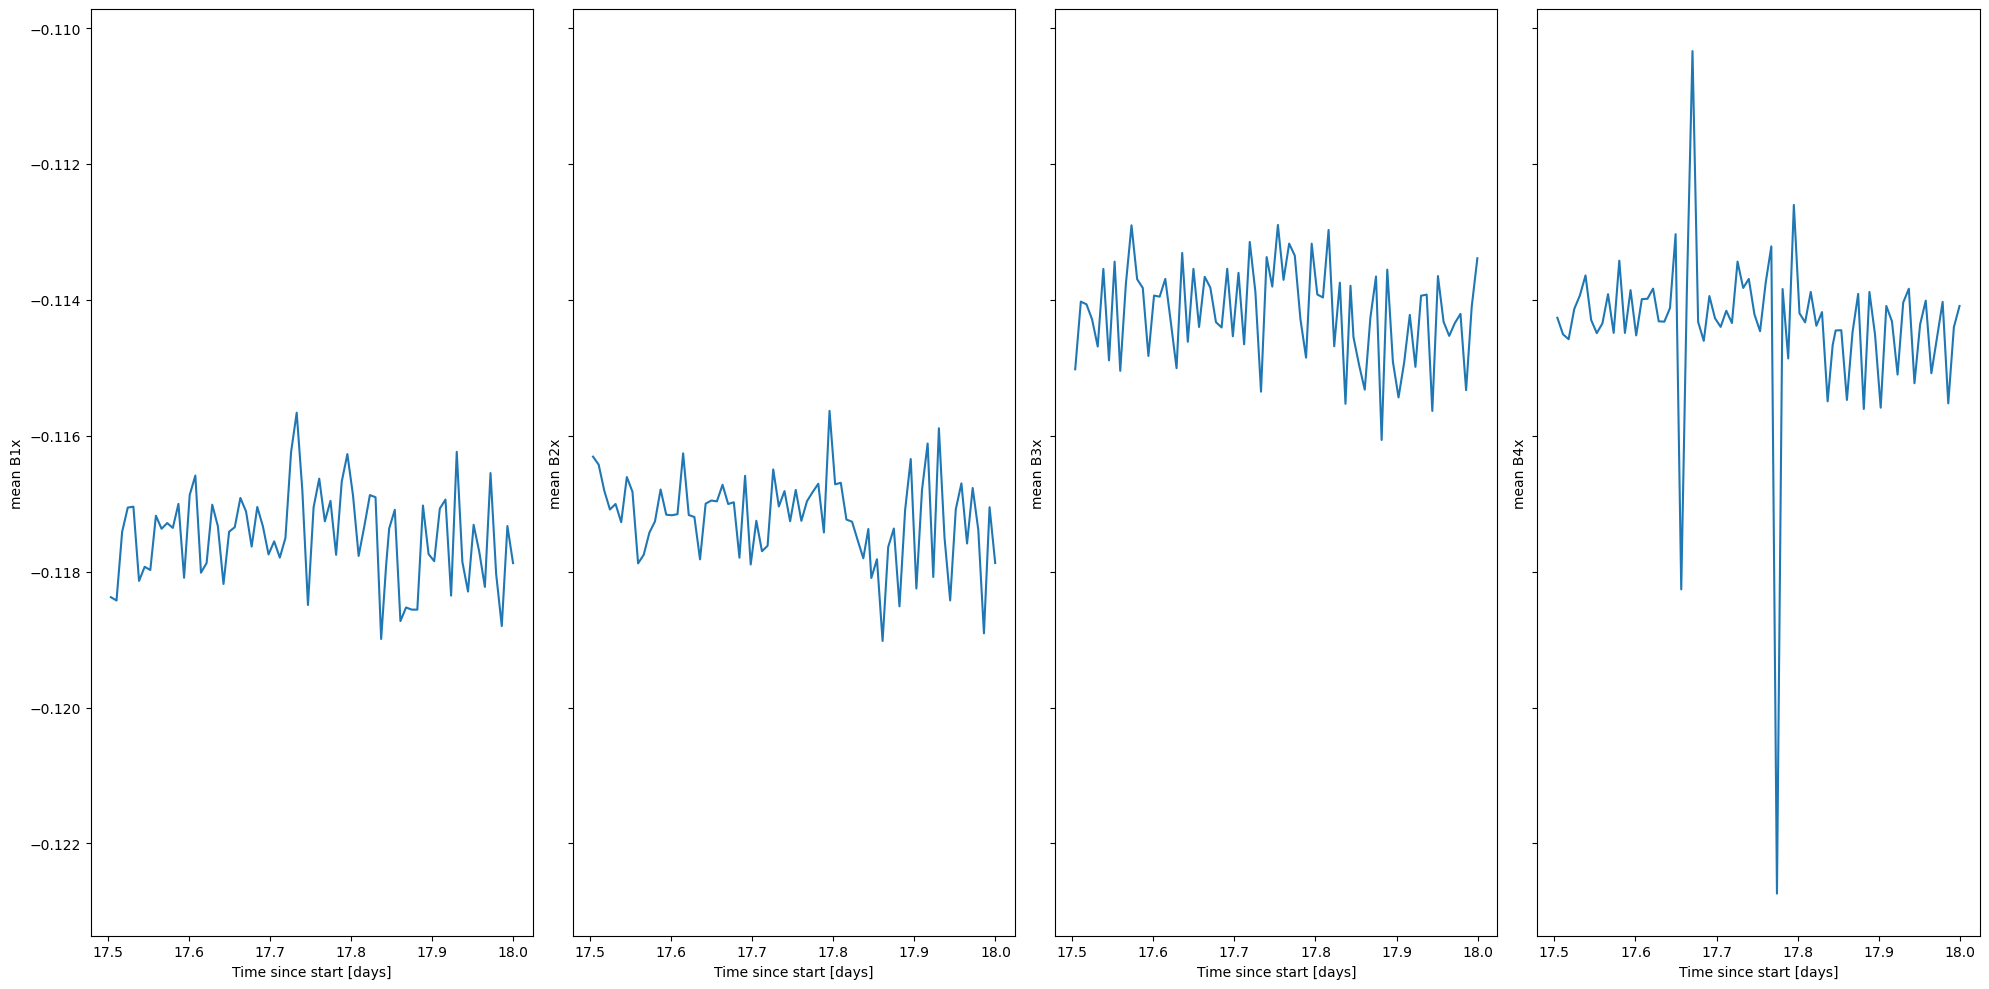

In [ ]:
start_time = 17.5 * 24 * 3600  # 10 days converted to seconds
end_time = 18 * 24 * 3600    # 20 days converted to seconds
filtered_df = df[(df['time'] > start_time) & (df['time'] <= end_time)]

fig, axes = plt.subplots(nrows=1, ncols=4, sharey=True, figsize=(20, 10))
x = filtered_df.groupby("measurement_id")["time"].head(1) / (3600 * 24)
for (sensor, ax) in zip(["B1x", "B2x", "B3x", "B4x"], axes.ravel()):
    y = filtered_df.groupby("measurement_id")[sensor].mean()
    ax.plot(x, y)
    ax.set_ylabel(f"mean {sensor}")
    ax.set_xlabel("Time since start [days]")
plt.tight_layout()
plt.show()

### Calculating mean day 20-30

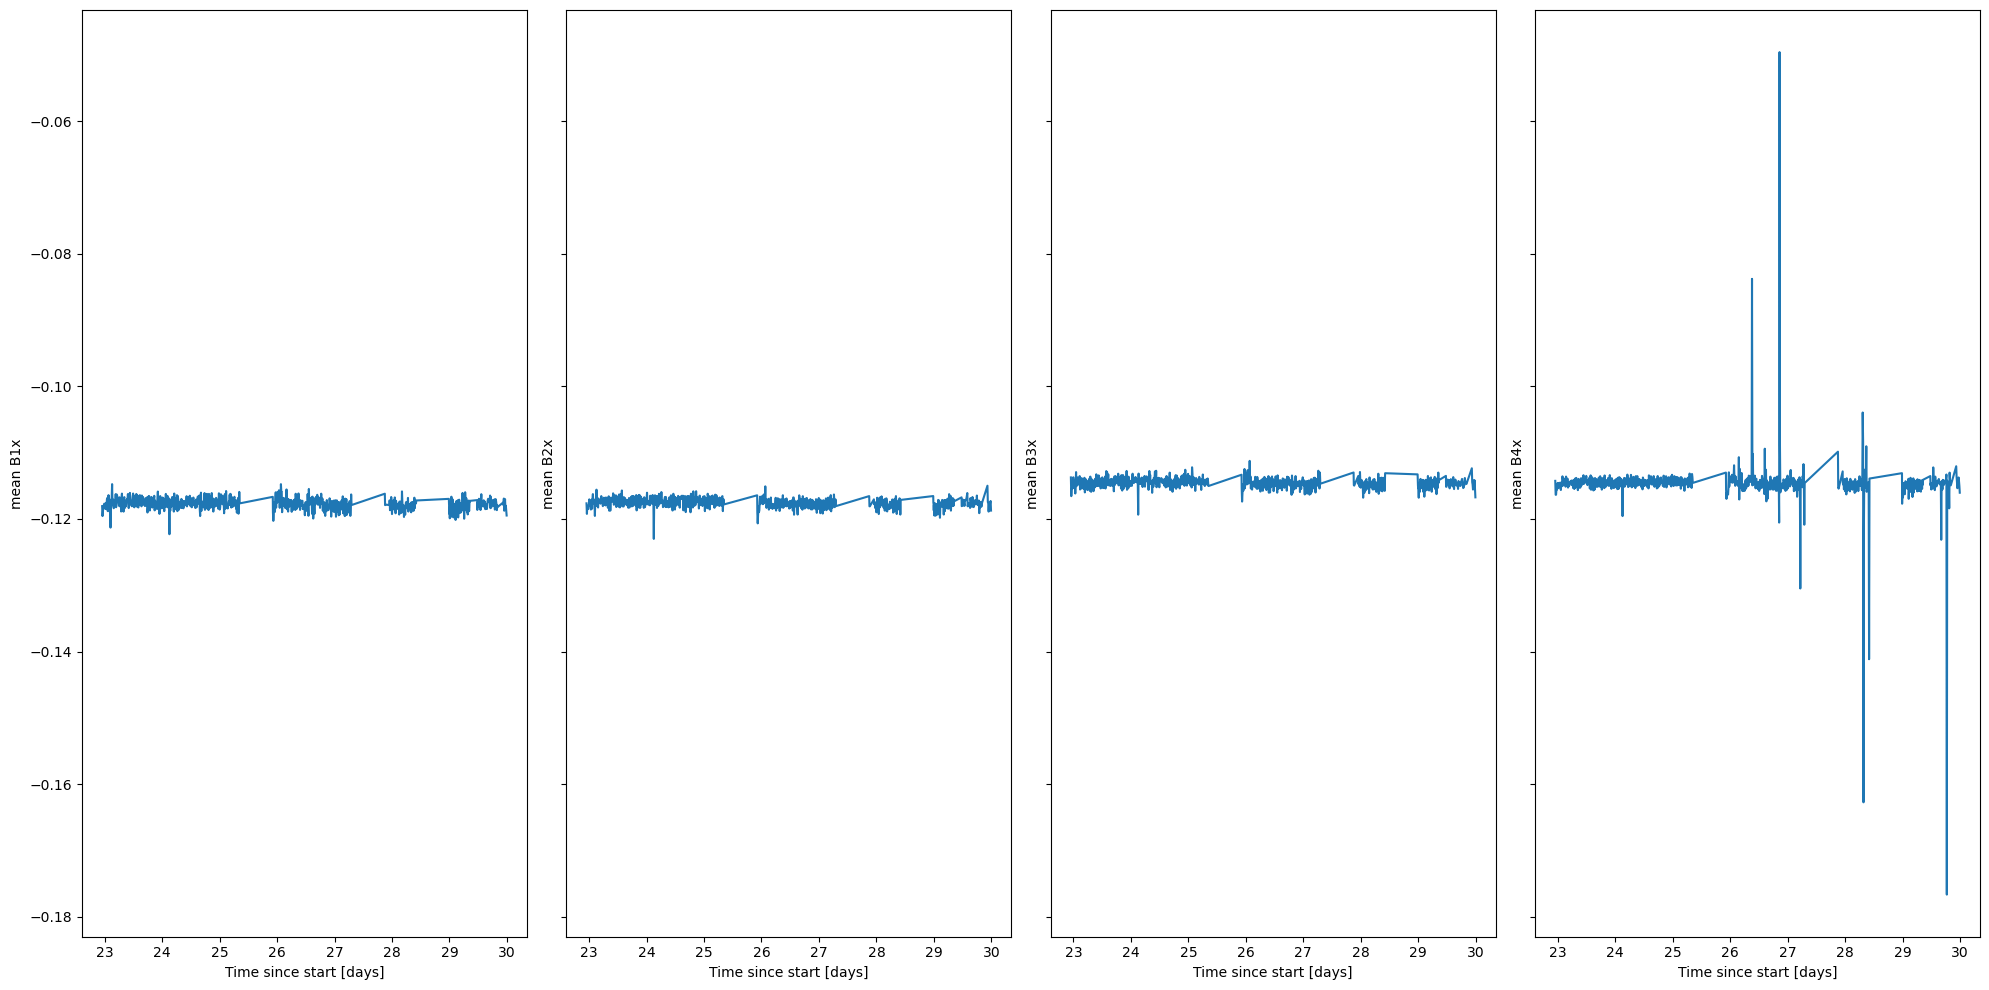

In [ ]:
start_time = 20 * 24 * 3600  # 10 days converted to seconds
end_time = 30 * 24 * 3600    # 20 days converted to seconds
filtered_df = df[(df['time'] > start_time) & (df['time'] <= end_time)]

fig, axes = plt.subplots(nrows=1, ncols=4, sharey=True, figsize=(20, 10))
x = filtered_df.groupby("measurement_id")["time"].head(1) / (3600 * 24)
for (sensor, ax) in zip(["B1x", "B2x", "B3x", "B4x"], axes.ravel()):
    y = filtered_df.groupby("measurement_id")[sensor].mean()
    ax.plot(x, y)
    ax.set_ylabel(f"mean {sensor}")
    ax.set_xlabel("Time since start [days]")
plt.tight_layout()
plt.show()

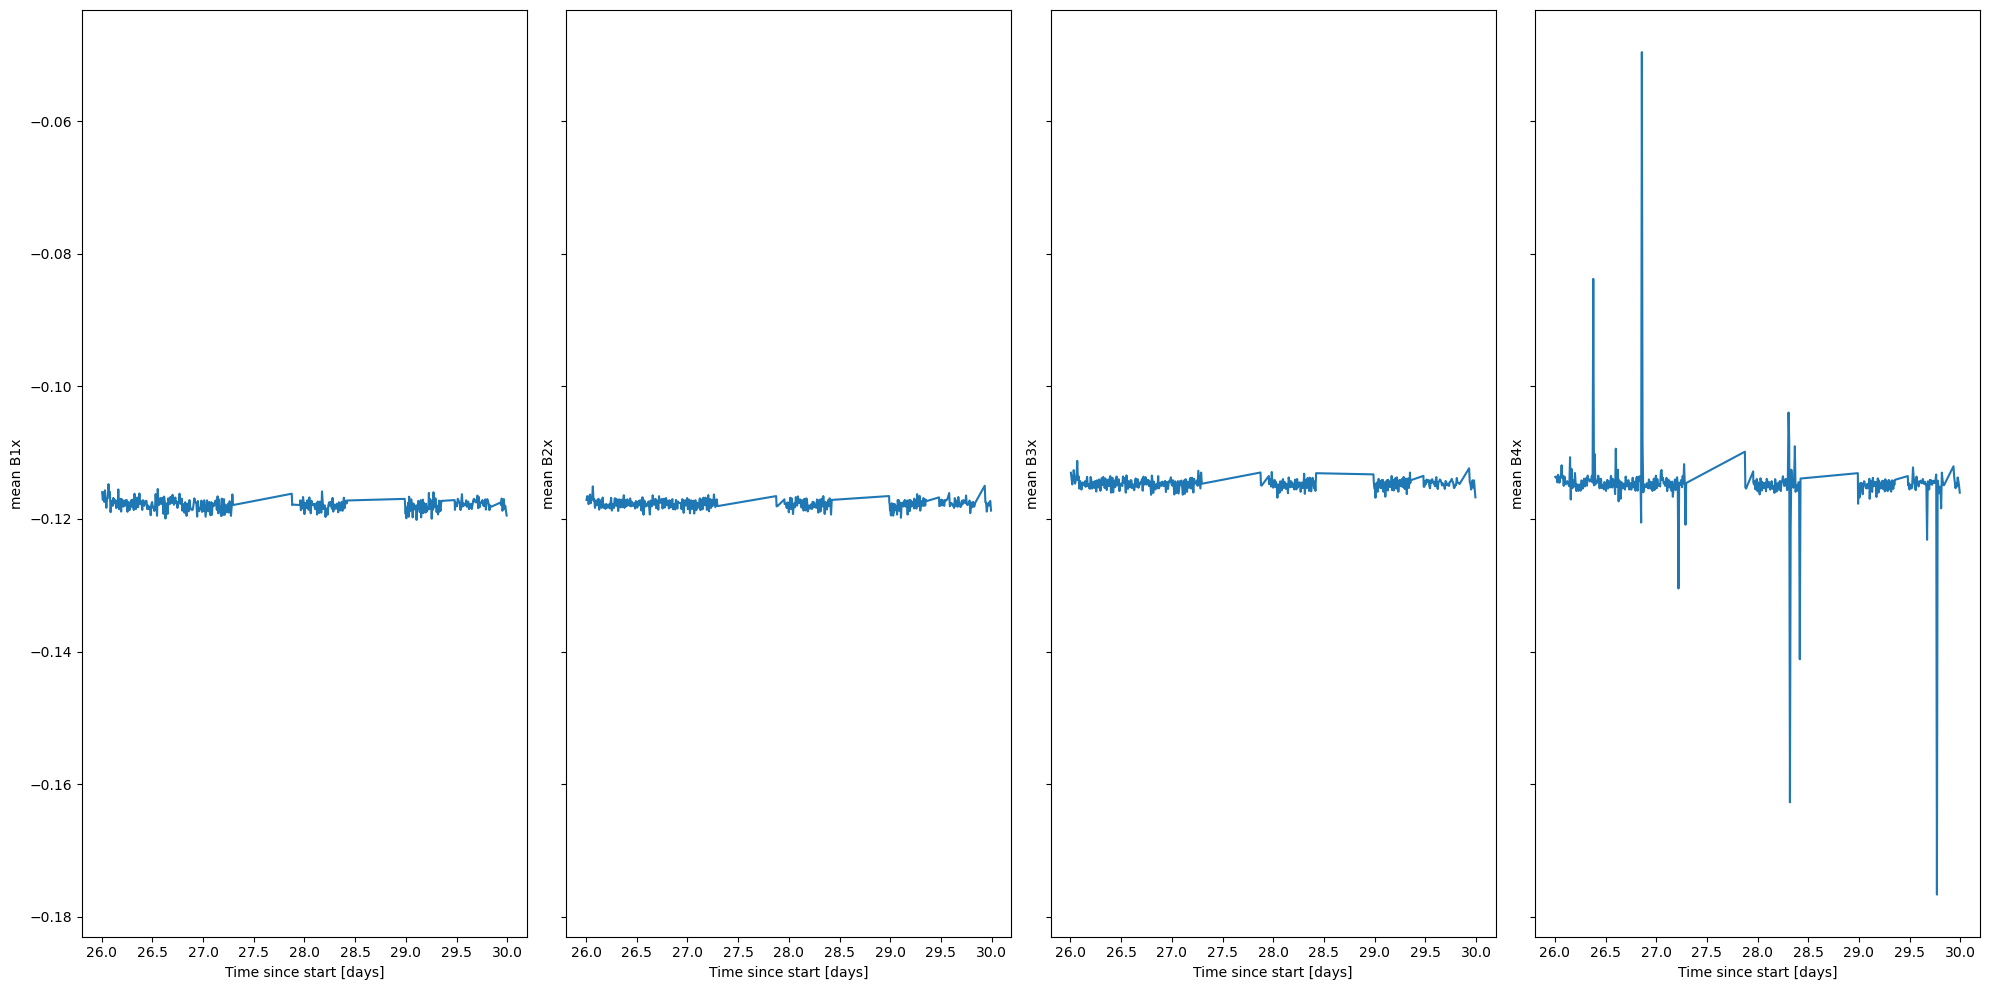

In [ ]:
start_time = 26 * 24 * 3600  # 10 days converted to seconds
end_time = 30 * 24 * 3600    # 20 days converted to seconds
filtered_df = df[(df['time'] > start_time) & (df['time'] <= end_time)]

fig, axes = plt.subplots(nrows=1, ncols=4, sharey=True, figsize=(20, 10))
x = filtered_df.groupby("measurement_id")["time"].head(1) / (3600 * 24)
for (sensor, ax) in zip(["B1x", "B2x", "B3x", "B4x"], axes.ravel()):
    y = filtered_df.groupby("measurement_id")[sensor].mean()
    ax.plot(x, y)
    ax.set_ylabel(f"mean {sensor}")
    ax.set_xlabel("Time since start [days]")
plt.tight_layout()
plt.show()

### Calculating mean day 30-35

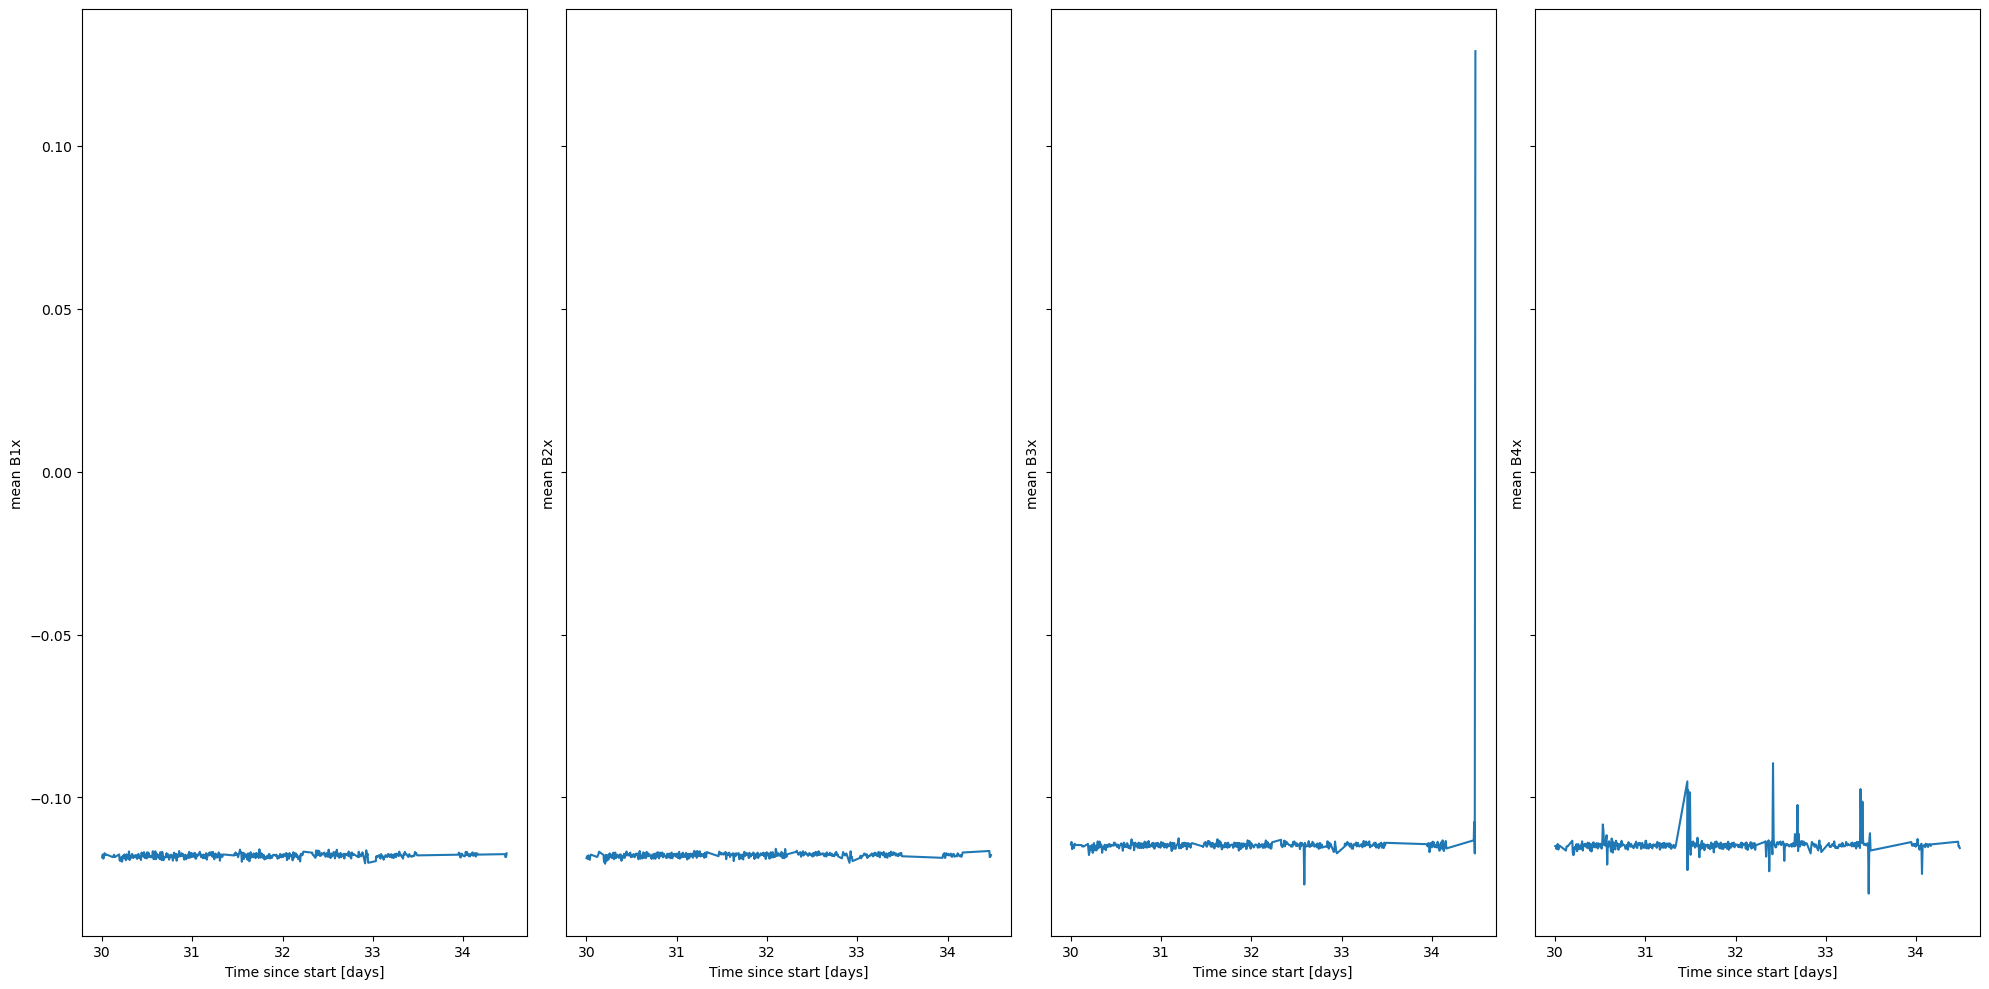

In [ ]:
start_time = 30 * 24 * 3600  # 10 days converted to seconds
end_time = 37 * 24 * 3600    # 20 days converted to seconds
filtered_df = df[(df['time'] > start_time) & (df['time'] <= end_time)]

fig, axes = plt.subplots(nrows=1, ncols=4, sharey=True, figsize=(20, 10))
x = filtered_df.groupby("measurement_id")["time"].head(1) / (3600 * 24)
for (sensor, ax) in zip(["B1x", "B2x", "B3x", "B4x"], axes.ravel()):
    y = filtered_df.groupby("measurement_id")[sensor].mean()
    ax.plot(x, y)
    ax.set_ylabel(f"mean {sensor}")
    ax.set_xlabel("Time since start [days]")
plt.tight_layout()
plt.show()

## Calculating the moving average
The moving average is used to smooth out short-term fluctuations and highlight longer-term trends or cycles in the data. It helps in identifying trends and patterns that might not be immediately visible in the raw data.

By applying a moving average to the sensor data, we can reduce noise and better observe the underlying behavior of the bearing vibrations.

This smoothing technique is particularly useful in monitoring the condition of bearings over time, as it helps in detecting gradual changes in the sensor readings that could indicate wear or potential failure.

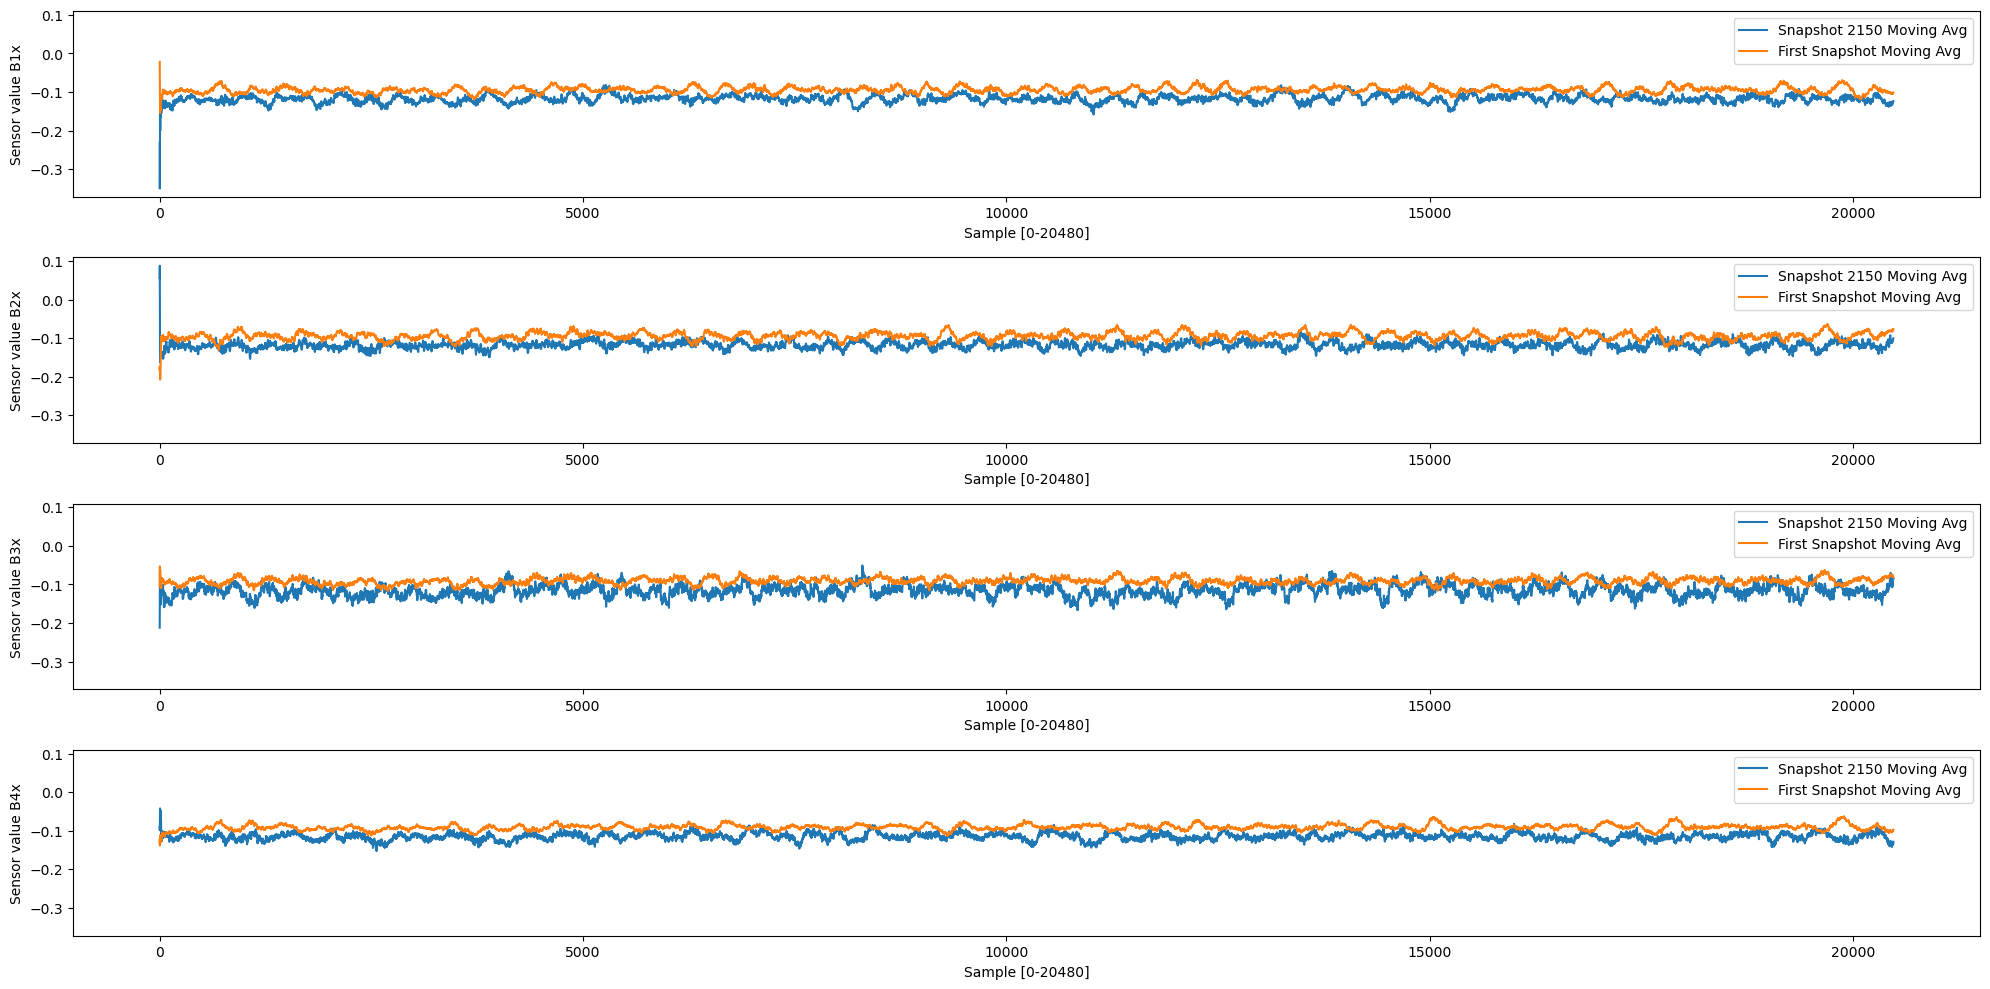

In [ ]:
#Calculating the moving average across all bearings 
fig, axes = plt.subplots(nrows=4, ncols=1, sharey=True, figsize=(20, 10))
x = np.arange(20480)

for (sensor, ax) in zip(["B1x", "B2x", "B3x", "B4x"], axes.ravel()):
    # Calculate the moving average with a window of 100 steps for each snapshot
    moving_avg_2150 = df.query("measurement_id == 2150")[sensor].rolling(window=100, min_periods=1).mean()
    moving_avg_0 = df.query("measurement_id == 0")[sensor].rolling(window=100, min_periods=1).mean()
    
    ax.plot(x, moving_avg_2150, label="Snapshot 2150 Moving Avg")
    ax.plot(x, moving_avg_0, label="First Snapshot Moving Avg")
    ax.set_ylabel(f"Sensor value {sensor}")
    ax.set_xlabel("Sample [0-20480]")
    ax.legend()
    
plt.tight_layout()
plt.show()

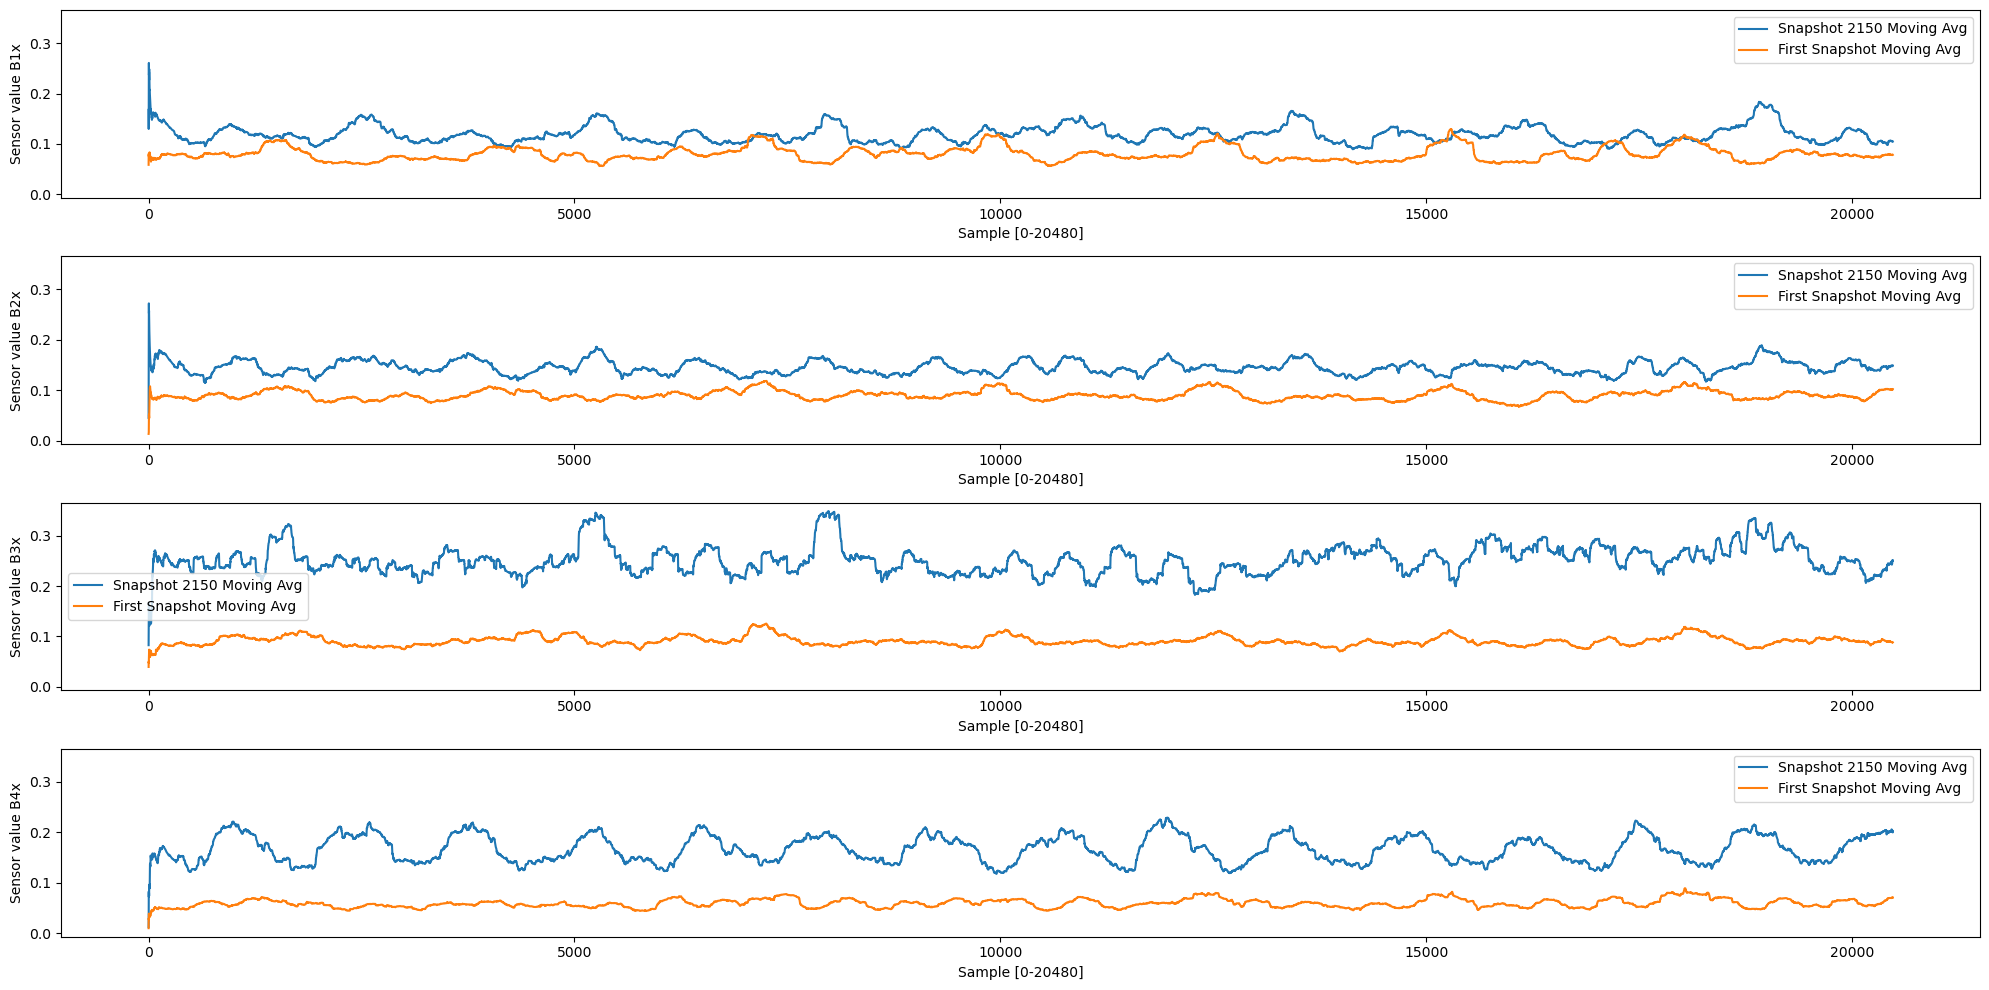

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=1, sharey=True, figsize=(20, 10))
x = np.arange(20480)

for (sensor, ax) in zip(["B1x", "B2x", "B3x", "B4x"], axes.ravel()):
    # Calculate the moving average with a window of 100 steps for each snapshot
    moving_avg_2150 = df.query("measurement_id == 2150")[sensor].rolling(window=300, min_periods=1).std()
    moving_avg_0 = df.query("measurement_id == 0")[sensor].rolling(window=300, min_periods=1).std()
    
    ax.plot(x, moving_avg_2150, label="Snapshot 2150 Moving Avg")
    ax.plot(x, moving_avg_0, label="First Snapshot Moving Avg")
    ax.set_ylabel(f"Sensor value {sensor}")
    ax.set_xlabel("Sample [0-20480]")
    ax.legend()
    
plt.tight_layout()
plt.show()

## Rolling window for detection
A rolling window technique is applied to calculate the moving average and standard deviation over a specified window size. We use this technique to smooth the data and identify trends and outliers more effectively

In [ ]:
window_size = 400  
num_std_dev = 3

rolling = df['B1x'].rolling(window=window_size)
mean = rolling.mean()
std_dev = rolling.std()

# Identify outliers
outliers = (df['B1x'] > (mean + num_std_dev * std_dev)) | (df['B1x'] < (mean - num_std_dev * std_dev))

# Resulting DataFrame with outliers marked
df['Rolling Mean'] = mean
df['Standard Deviation'] = std_dev
df['Outlier'] = outliers

0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
              ...   
44154875   -0.117375
44154876   -0.117595
44154877   -0.117682
44154878   -0.117737
44154879   -0.117720
Name: B1x, Length: 44154880, dtype: float64